## 5.딥러닝3 : hidden layer
* 이제 레이어를 추가해 보겠습니다.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### (1) 데이터 전처리

* 데이터 분할

In [4]:
target = 'medv' # 집값
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [5]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [6]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [7]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언(입력은 리스트로!)
model3 = Sequential([Input(shape = (nfeatures,)),
                     Dense(2, activation = 'relu'),
                     Dense(1)   ])

# 모델요약
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            26 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (116.00 B)

 Trainable params: 29 (116.00 B)

 Non-trainable params: 0 (0.00 B)



* compile

In [8]:
model3.compile( optimizer= Adam(learning_rate=0.1), loss = 'mse')

* 학습

In [9]:
hist = model3.fit(x_train, y_train, epochs = 50 , validation_split= .2 ).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 504.7051 - val_loss: 283.5135
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 202.9851 - val_loss: 185.2186
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 164.0011 - val_loss: 122.3423
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 94.1348 - val_loss: 88.7794
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 70.3799 - val_loss: 65.9770
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 72.3401 - val_loss: 55.4150
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 55.1969 - val_loss: 49.6941
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 52.2233 - val_loss: 46.6855
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 53.4198 - val_loss: 43.8429
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 46.2241 - val_loss: 40.3809
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 56.6253 - val_loss: 37.0376
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9

* 학습결과 그래프

In [11]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

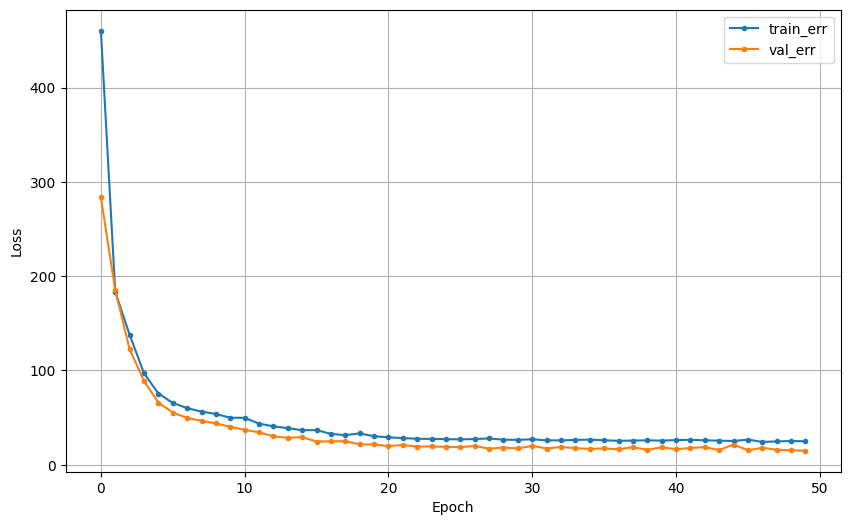

In [12]:
dl_history_plot(hist)

* 예측 및 평가

In [13]:
pred3 = model3.predict(x_val)
print(f'RMSE : {root_mean_squared_error(y_val, pred3)}')
print(f'MAE  : {mean_absolute_error(y_val, pred3)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
RMSE : 4.467000170785584
MAE  : 3.4459510971518124
MAPE : 0.17795887807014635


### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 |
| dense_1 (Dense) | (None, 1) | 9 |     

In [15]:
model4 = Sequential([Input(shape = (nfeatures,)),
                     Dense(8, activation = 'relu'),
                     Dense(1) ])
model4.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

* 컴파일 + 학습

In [16]:
model4.compile(Adam(learning_rate = 0.1), loss='mse')


* 학습곡선

In [17]:
hist = model4.fit(x_train, y_train, epochs = 50, validation_split= .2 ).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 478.3577 - val_loss: 201.5769
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 170.3157 - val_loss: 117.3633
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 94.5185 - val_loss: 62.6100
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 65.0632 - val_loss: 52.6677
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 71.6693 - val_loss: 43.5144
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 47.1593 - val_loss: 37.3549
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 40.8156 - val_loss: 32.8345
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 52.4590 - val_loss: 40.8334
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 43.6349 - val_loss: 22.5080
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31.7472 - val_loss: 19.5722
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.6890 - val_loss: 18.9479
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s

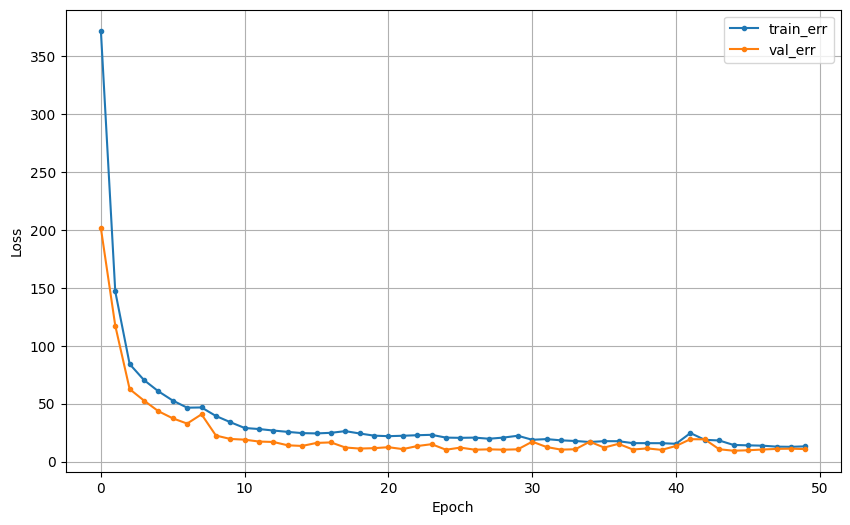

In [18]:
dl_history_plot(hist)

* 검증

In [19]:
pred4 = model4.predict(x_val)
print(f'RMSE : {root_mean_squared_error(y_val, pred4)}')
print(f'MAE  : {mean_absolute_error(y_val, pred4)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred4)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
RMSE : 3.8569839721911214
MAE  : 2.8962557343875663
MAPE : 0.15259333990745547


### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 | node, input_shape, activation |
| dense_1 (Dense) | (None, 4) | 36 | node, activation |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [20]:
model5 = Sequential([Input(shape=(nfeatures,)),
                     Dense(8, activation ='relu'),
                     Dense(4, activation ='relu'),
                     Dense(1)])
model5.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

* 컴파일 + 학습

In [21]:
model5.compile(Adam(learning_rate=0.1), loss='mse')

In [22]:
hist = model5.fit(x_train, y_train, epochs=50, validation_split=.2).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 452.0412 - val_loss: 162.0329
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 141.7966 - val_loss: 87.5651
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 85.2613 - val_loss: 86.7111
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 86.2259 - val_loss: 45.9264
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 57.3433 - val_loss: 40.0563
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 49.7217 - val_loss: 35.5180
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 46.5651 - val_loss: 27.6834
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 35.2367 - val_loss: 21.5184
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31.0825 - val_loss: 16.3164
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.3431 - val_loss: 13.5264
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.3134 - val_loss: 11.8739
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms

* 학습곡선

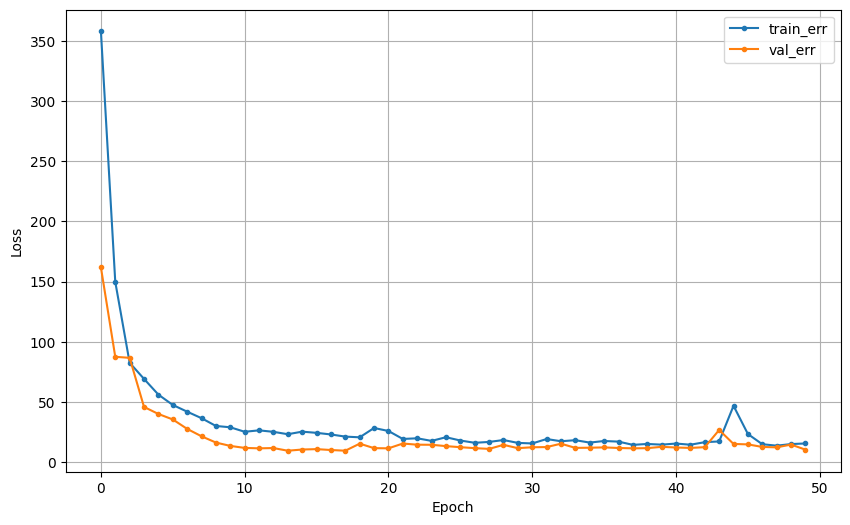

In [23]:
dl_history_plot(hist)

* 검증

In [24]:
pred5 = model5.predict(x_val)
print(f'RMSE : {root_mean_squared_error(y_val, pred5)}')
print(f'MAE  : {mean_absolute_error(y_val, pred5)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred5)}')

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
RMSE : 3.9652127499431664
MAE  : 2.989372885460948
MAPE : 0.1628821449135875
